# Datos faltantes

In [2]:
import pandas as pd
import plotly.express as px
import numpy as np

: 

In [8]:
# f = '../../data/Temixco_2018_10Min.parquet'
# tmx = pd.read_parquet(f)

# start_date = '2018-03-30'
# end_date = '2018-03-31' 
# # Seleccionar las filas del rango de fechas
# selected_rows = tmx.loc[start_date:end_date]

# # Crear un patrón para eliminar 6 filas seguidas y dejar una
# pattern = []
# for i in range(len(selected_rows)):
#     if (i % 7) != 6:  # Mantener solo el séptimo elemento
#         pattern.append(True)
#     else:
#         pattern.extend([False] * 6)

# # Asegurarse de que el patrón no exceda el tamaño de las filas seleccionadas
# pattern = pattern[:len(selected_rows)]

# # Aplicar el patrón
# indices_to_drop = selected_rows[pattern].index
# tmx.drop(indices_to_drop, inplace=True)

# start_date = '2018-03-07'
# end_date = '2018-03-14'  # Esto cubre dos semanas completas
# tmx.loc[start_date:end_date, 'To'] = np.nan

# tmx = tmx.loc['2018-03']

# tmx.to_parquet('../../data/Temixco_2018_Marzo_10Min_NaN.parquet')

In [9]:
f = '../../data/Temixco_2018_Marzo_10Min_NaN.parquet'
tmx = pd.read_parquet(f)
tmx.info()

: 

In [1]:
tmx.isna().sum()

NameError: name 'tmx' is not defined

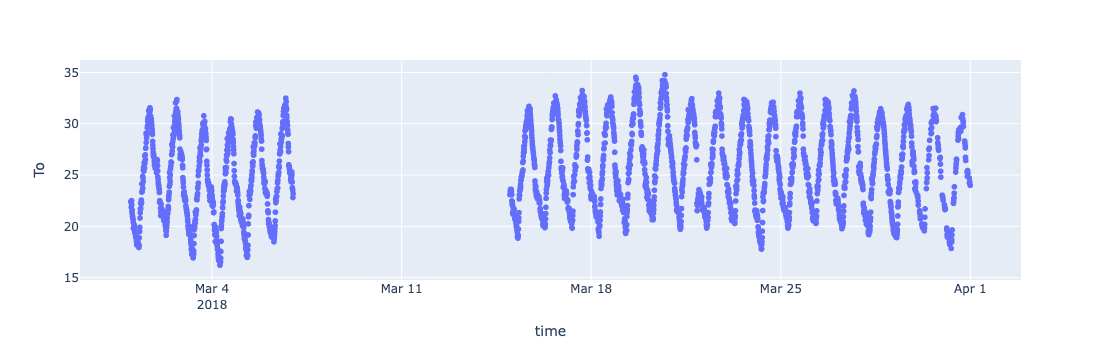

In [10]:
px.scatter(tmx,x=tmx.index,y='To') # Nota los datos faltantes a finales de marzo

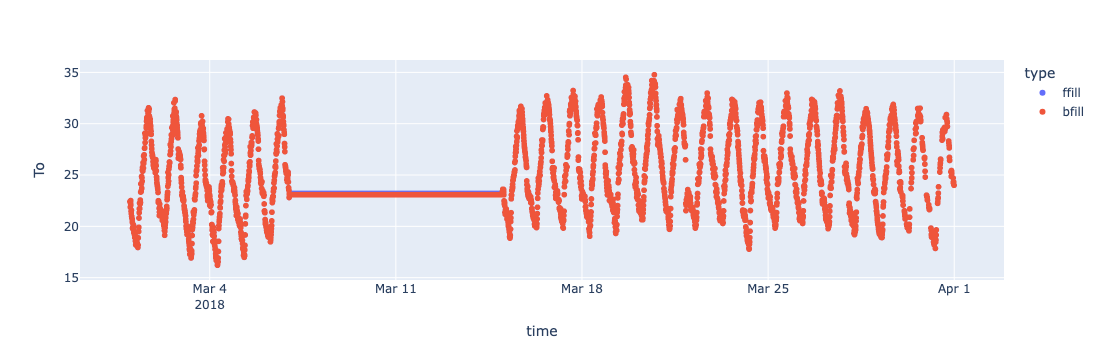

In [9]:
tmx_ffill = tmx['To'].ffill().reset_index()
tmx_ffill['type'] = 'ffill'

tmx_bfill = tmx['To'].bfill().reset_index()
tmx_bfill['type'] = 'bfill'

tmx_combinado = pd.concat([tmx_ffill,tmx_bfill])

px.scatter(tmx_combinado, x = 'time', y = 'To',color='type')

In [7]:
tmx['To'].loc['2018-03-31 1:50':]

time
2018-03-31 01:50:00    21.67
2018-03-31 03:00:00    19.83
2018-03-31 03:10:00    19.63
2018-03-31 03:20:00    19.20
2018-03-31 03:30:00    18.97
                       ...  
2018-03-31 23:10:00    24.24
2018-03-31 23:20:00    24.35
2018-03-31 23:30:00    24.32
2018-03-31 23:40:00    24.06
2018-03-31 23:50:00    24.00
Name: To, Length: 67, dtype: float64

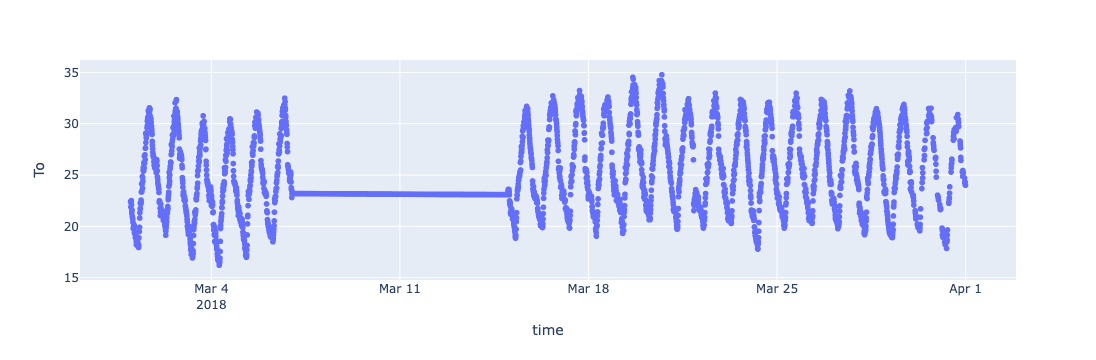

In [8]:
px.scatter(
    tmx['To'].interpolate(method='time').reset_index(),
    x = 'time',
    y = 'To'
)

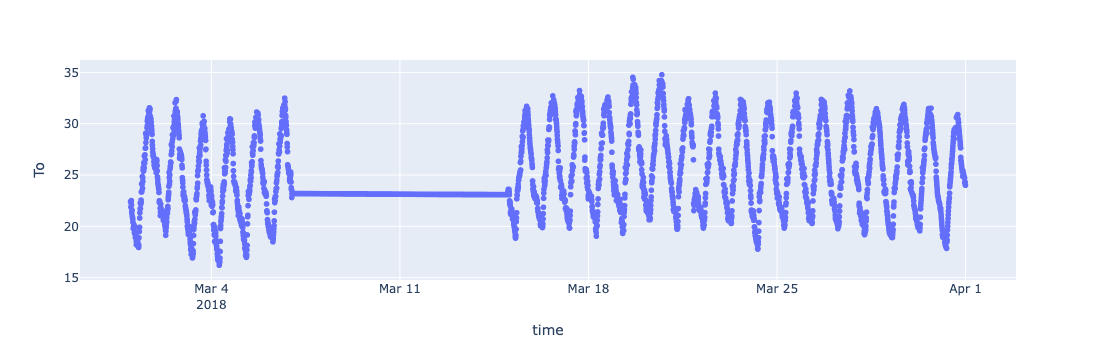

In [9]:
px.scatter(
    tmx['To'].resample('10Min').interpolate(method='time').reset_index(),
    x = 'time',
    y = 'To'
)